In [19]:
import sys
!{sys.executable} -m pip install drawsvg
import drawsvg as draw
import math

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


Surface area: 9.34590374339597 dm^2
Span: 748.835245300165 mm
Chord: 124.80587421669416 mm
Tip chord: 77.46571503105154 mm
Root chord: 172.14603340233677 mm
Fin surface area: 9345.903743395971 mm^2
Fin chord: 136.71798523527158 mm
Fin height: 68.35899261763579 mm
Sweep: 25 degrees
Height 122.70815468916037 mm
Width 146.23788419141292 mm


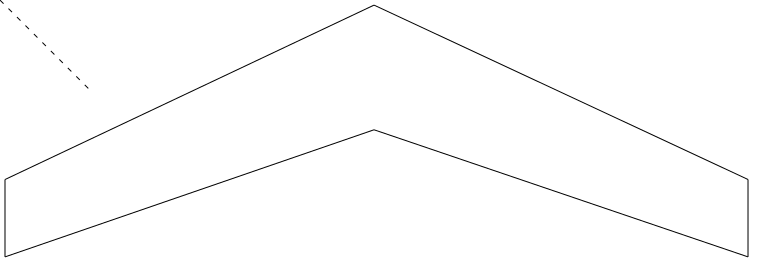

In [54]:
padding = 5  # Padding for the SVG.

# Settings for the flying wing.
airfoilTopLength =  190.9
wcl = 7  # Wing cube loading of the glider.
ar = 6  # Aspect ratio fo the wing.
finAR = 2  # Aspect ratio of the fin.
taper = 0.45  # Taper ratio of the wing.
weight = 200 # Weight in grams of the projected glider.
sweep = 25  # Sweep angle of the leading edge.

sa = (weight / wcl) ** (1 / 1.5)

saMM = sa * 10000

span = (ar * saMM) ** (1 / 2)

chord = span / ar

rootChord = (2 * chord) / (1 + taper)

tipChord = rootChord * taper

finSA = 0.1 * saMM

finChord = (finAR * finSA) ** (1 / 2)

finHeight = finChord / finAR

print("Surface area:", sa, "dm^2")
print("Span:", span, "mm")
print("Chord:", chord, "mm")
print("Tip chord:", tipChord, "mm")
print("Root chord:", rootChord, "mm")
print("Fin surface area:", finSA, "mm^2")
print("Fin chord:", finChord, "mm")
print("Fin height:", finHeight, "mm")
print("Sweep:", sweep, "degrees")

halfSpan = span / 2

le = halfSpan / math.cos(math.radians(sweep))
offset = halfSpan * math.tan(math.radians(sweep))

width = airfoilTopLength * math.sin(math.radians(180-sweep*2))
height = math.sqrt(airfoilTopLength ** 2 - width ** 2)

print("Height", height, "mm")
print("Width", width, "mm")

d = draw.Drawing(span + padding * 2, padding * 2 + offset + tipChord, origin=(0, 0))

d.append(draw.Lines(padding, offset + padding, halfSpan, padding, stroke="black"))

d.append(
    draw.Lines(
        padding, offset + padding, padding, offset + tipChord + padding, stroke="black"
    )
)

d.append(draw.Lines(halfSpan, padding, span, offset + padding, stroke="black"))

d.append(
    draw.Lines(
        span, offset + padding, span, offset + tipChord + padding, stroke="black"
    )
)

d.append(draw.Lines(padding, offset + padding + tipChord, halfSpan, chord + padding, stroke="black"))

d.append(
    draw.Lines(
         halfSpan, padding + chord, span, tipChord + offset + padding, stroke="black"
    )
)

d.append(draw.Lines(0, 0, 90, 90, stroke="black", stroke_dasharray='5,7'))

d